# **Dataset Preparation**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


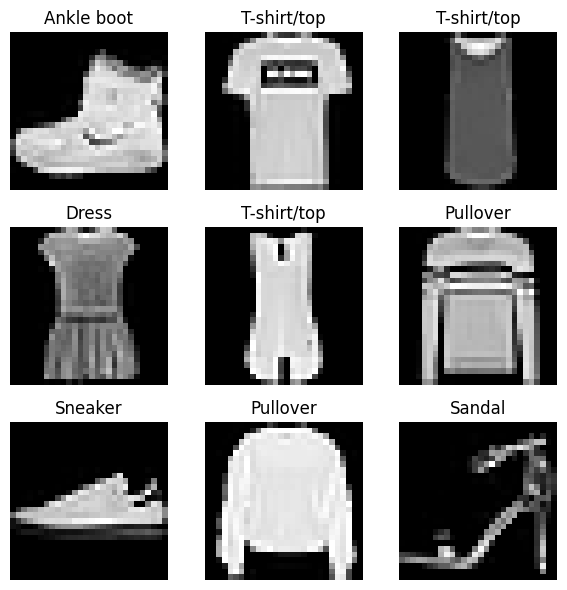

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show 9 sample images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


# **Preprocess the Data**

In [2]:
# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [3]:
#Flatten and One-hot encode
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# **Neural Network Implementation**

In [5]:
#Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(784,)),  # Explicit input layer
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [10]:
#Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
#Train the Model
history = model.fit(
    X_train, y_train_cat,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

Epoch 1/15
750/750 - 6s - 9ms/step - accuracy: 0.8615 - loss: 0.3868 - val_accuracy: 0.8680 - val_loss: 0.3674
Epoch 2/15
750/750 - 4s - 5ms/step - accuracy: 0.8731 - loss: 0.3474 - val_accuracy: 0.8697 - val_loss: 0.3759
Epoch 3/15
750/750 - 4s - 5ms/step - accuracy: 0.8818 - loss: 0.3204 - val_accuracy: 0.8751 - val_loss: 0.3478
Epoch 4/15
750/750 - 4s - 6ms/step - accuracy: 0.8883 - loss: 0.3025 - val_accuracy: 0.8820 - val_loss: 0.3236
Epoch 5/15
750/750 - 4s - 5ms/step - accuracy: 0.8921 - loss: 0.2862 - val_accuracy: 0.8807 - val_loss: 0.3329
Epoch 6/15
750/750 - 5s - 6ms/step - accuracy: 0.8983 - loss: 0.2726 - val_accuracy: 0.8849 - val_loss: 0.3183
Epoch 7/15
750/750 - 5s - 6ms/step - accuracy: 0.9015 - loss: 0.2611 - val_accuracy: 0.8848 - val_loss: 0.3166
Epoch 8/15
750/750 - 4s - 5ms/step - accuracy: 0.9054 - loss: 0.2505 - val_accuracy: 0.8824 - val_loss: 0.3244
Epoch 9/15
750/750 - 4s - 5ms/step - accuracy: 0.9098 - loss: 0.2420 - val_accuracy: 0.8771 - val_loss: 0.3427
E

# **Model Evaluation**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.85      0.73      0.79      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.69      0.71      0.70      1000
     Sneaker       0.95      0.93      0.94      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.94      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



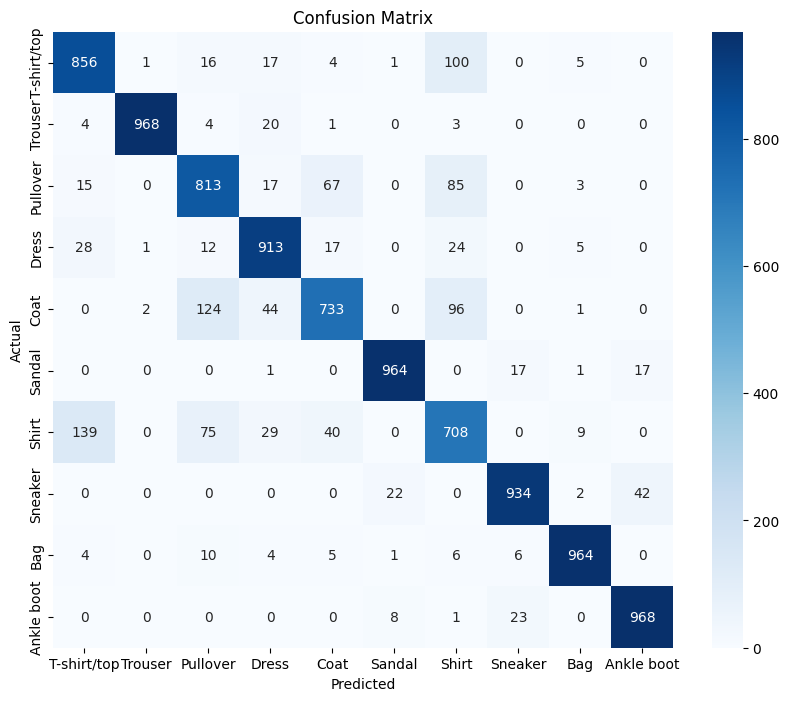

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

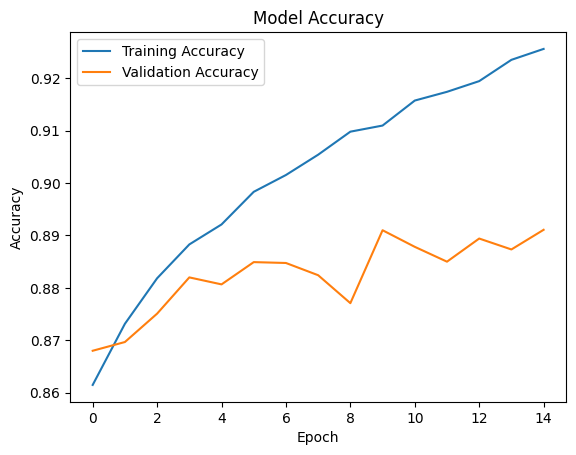

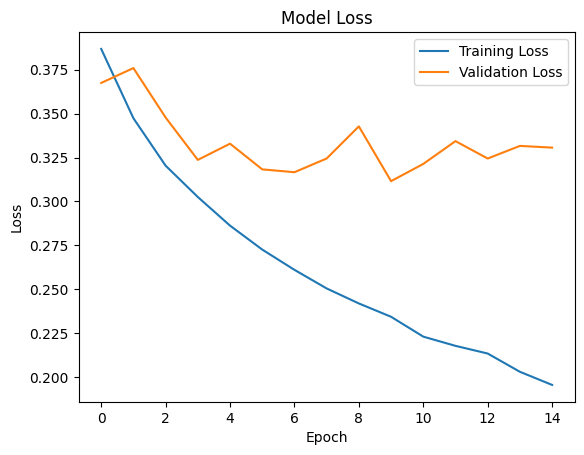

In [13]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()